In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [3]:


np.random.seed(42)

n = 200

data = pd.DataFrame({
    "Sales": np.random.normal(200, 40, n).astype(int),
    "Marketing_Spend": np.random.normal(25, 6, n).astype(int),
    "Customer_Count": np.random.normal(500, 120, n).astype(int),
    "Discount": np.random.uniform(0, 20, n).round(2),
    "Region": np.random.choice(["North", "South", "East", "West"], n)
})

data.head()


,Sales,Marketing_Spend,Customer_Count,Discount,Region
0,219,27,308,4.59,East
1,194,28,428,14.45,West
2,225,31,500,14.40,East
3,260,31,505,12.82,North
4,190,16,445,13.88,South


In [4]:
data.describe()


,Sales,Marketing_Spend,Customer_Count,Discount
count,200.000000,200.000000,200.000000,200.000000
mean,197.870000,25.025000,489.240000,9.448750
std,37.233382,5.900718,119.312319,5.713506
min,95.000000,5.000000,203.000000,0.090000
25%,171.000000,21.000000,404.000000,4.405000
50%,199.500000,25.000000,490.500000,9.060000
75%,219.250000,29.000000,568.250000,13.982500
max,308.000000,48.000000,869.000000,19.940000


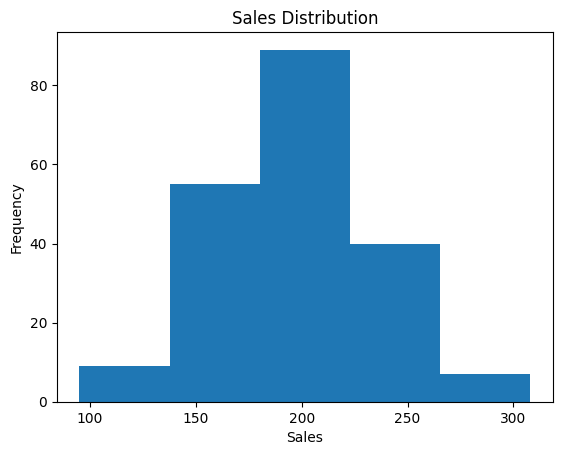

In [5]:
plt.hist(data["Sales"], bins=5)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()


/tmp/ipython-input-3936218901.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data["Sales"], shade=True)


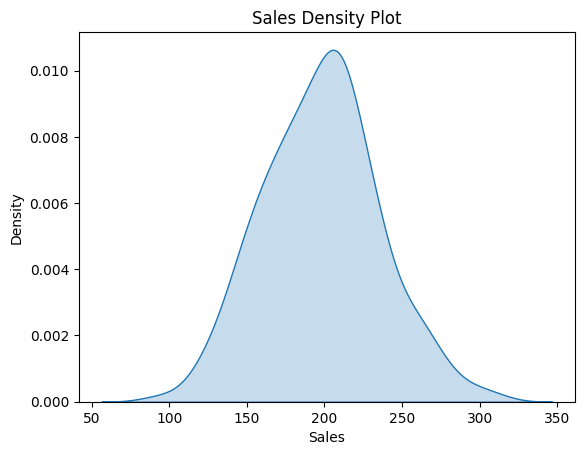

In [6]:
sns.kdeplot(data["Sales"], shade=True)
plt.title("Sales Density Plot")
plt.show()


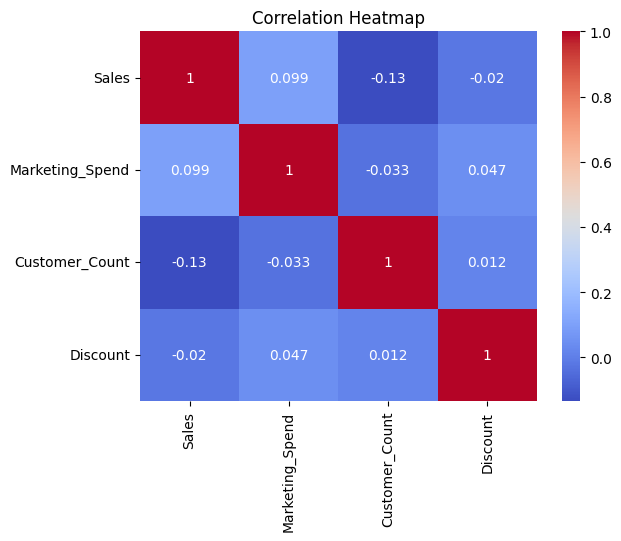

np.float64(0.09916623624640626)

In [8]:
corr = data.select_dtypes(include="number").corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

corr["Sales"]["Marketing_Spend"]


A positive correlation close to +1 indicates that higher marketing spend is strongly associated with higher sales.

In [9]:
group1 = data["Sales"][:5]
group2 = data["Sales"][5:]

t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=False)
t_stat, p_val


(np.float64(1.5714817183127898), np.float64(0.18518283141461928))

Interpretation:

* If p < 0.05: Sales improvement is statistically significant.

* If p > 0.05: No strong evidence of improvement.

In [10]:
mean = np.mean(data["Sales"])
std = np.std(data["Sales"], ddof=1)
n = len(data)


ci = stats.t.interval(0.95, df=n-1, loc=mean, scale=std/np.sqrt(n))
ci


(np.float64(192.6782373873826), np.float64(203.0617626126174))

We are 95% confident that the true average sales lies within this interval.